<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/AutoEncoder%20CNN(mnist%20with%20%EC%9E%A1%EC%9D%8C%EC%A0%9C%EA%B1%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# mnist 데이터를 다운로드한다
(d_train, y_train), (d_test, y_test) = mnist.load_data()
d_train.shape, y_train.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [ ]:
# input data를 생성한다
x_train = d_train / 255
x_train = x_train.reshape(-1, 28, 28, 1)  # CNN 입력을 위해 channel(1) 축을 추가한다.

x_test = d_test / 255
x_test = x_test.reshape(-1, 28, 28, 1)

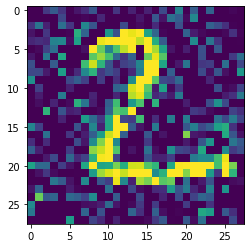

In [ ]:
# 학습 데이터와 시험 데이터에 노이즈를 삽입한다.
xn_train = x_train + 0.3 * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
xn_test = x_test + 0.3 * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

xn_train = np.clip(xn_train, 0., 1.)  # 0 이하면 "0", 1 이상이면 "1" // clip을 사용한다
xn_test = np.clip(xn_test, 0., 1.)

xn_train.shape, xn_test.shape

plt.imshow(x_test[1].reshape(28, 28))
plt.imshow(xn_test[1].reshape(28, 28))

In [ ]:
# CNN AutoEncoder.
n_height = xn_train.shape[1]
n_width = xn_train.shape[2]
x_input = Input(batch_shape=(None, n_height, n_width, 1))

# encoder
e_conv = Conv2D(filters=10, kernel_size=(3,3), strides=1, padding = 'same', activation='relu')(x_input)
e_pool = MaxPooling2D(pool_size=(2,2), strides=1, padding='same')(e_conv)

# decoder
d_conv = Conv2DTranspose(filters=10, kernel_size=(3,3), strides=1, padding = 'same', activation='relu')(e_pool)
y_output = Conv2D(1, kernel_size=(3,3), strides=1, padding = 'same', activation='sigmoid')(d_conv)

model = Model(x_input, y_output)
# one-hot 이면 softmax와 categorical_crossentropy를 쓴다.
# one-hot에서 각 뉴런을 따로 계산해야하면 sigmoid와 binary_crossentropy를 쓴다.
# binary classification, multi-class classification, multi - classification(뉴런의 값이 각각 되어 있을때)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.005))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 10)       0         
 )                                                               
                                                                 
 conv2d_transpose (Conv2DTra  (None, 28, 28, 10)       910       
 nspose)                                                         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 1)         91        
                                                                 
Total params: 1,101
Trainable params: 1,101
Non-trainable par

In [ ]:
# autoencoder를 학습한다
hist = model.fit(xn_train, x_train, epochs=50, batch_size=1024)

Epoch 1/50
59/59 [==============================] - 13s 49ms/step - loss: 0.3134
Epoch 2/50
59/59 [==============================] - 3s 43ms/step - loss: 0.1417
Epoch 3/50
59/59 [==============================] - 3s 45ms/step - loss: 0.1006
Epoch 4/50
59/59 [==============================] - 3s 43ms/step - loss: 0.0860
Epoch 5/50
59/59 [==============================] - 2s 42ms/step - loss: 0.0837
Epoch 6/50
59/59 [==============================] - 2s 42ms/step - loss: 0.0827
Epoch 7/50
59/59 [==============================] - 2s 40ms/step - loss: 0.0821
Epoch 8/50
59/59 [==============================] - 3s 47ms/step - loss: 0.0818
Epoch 9/50
59/59 [==============================] - 3s 48ms/step - loss: 0.0814
Epoch 10/50
59/59 [==============================] - 3s 44ms/step - loss: 0.0812
Epoch 11/50
59/59 [==============================] - 2s 42ms/step - loss: 0.0809
Epoch 12/50
59/59 [==============================] - 2s 41ms/step - loss: 0.0807
Epoch 13/50
59/59 [=================

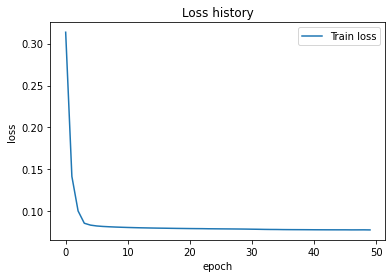

In [ ]:
# Loss history를 그린다
plt.plot(hist.history['loss'], label='Train loss')
plt.legend()
plt.title("Loss history")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
# 화면에 이미지를 그린다.
def showImage(x):
    n = 0
    for k in range(2):
        plt.figure(figsize=(8, 2))
        for i in range(5):
            ax = plt.subplot(1, 5, i+1)
            plt.imshow(x[n].reshape(28, 28))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            n += 1
        plt.show()


잡음이 삽입된 이미지 :


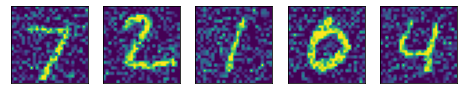

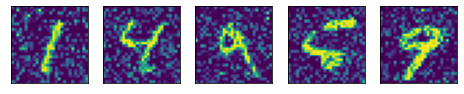

In [ ]:
# 노이즈가 추가된 시험 데이터 10개를 그려본다.
print("\n잡음이 삽입된 이미지 :")
showImage(xn_test)


잡음이 제거된 이미지 :


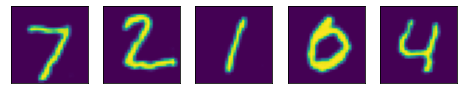

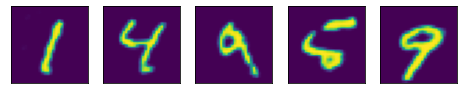

In [ ]:
# 노이즈가 제거된 시험 데이터 10개를 그려본다.
print("\n잡음이 제거된 이미지 :")
xn_test = xn_test.reshape(-1, 28, 28, 1)      # channel 축을 추가한다.
xd_test = model.predict(xn_test)
showImage(xd_test)